<a href="https://colab.research.google.com/github/kalyaannnn/TextClassification-using-BERT/blob/main/TextClassification_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.6 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset,DatasetDict
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = "https://raw.githubusercontent.com/kalyaannnn/TextClassification-using-BERT/main/labeled_data.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


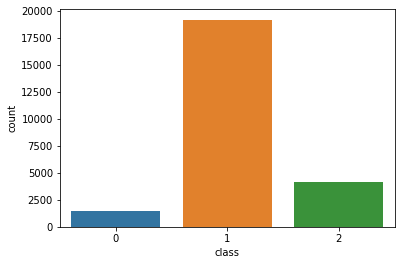

In [5]:
import seaborn as sns
sns.countplot('class', data = df)

In [6]:
df['newTweet'] = df['tweet'].str.replace('@[A-Za-z0-9]', '', regex = True)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,newTweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT ayasolovely: As a woman you shouldn't c...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT leew17: boy dats cold...tyga dwn bad ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT rKindOfBrand Dawg!!!! RT 0sbaby4lif...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT _G_Anderson: iva_based she look l...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT henikaRoberts: The shit you h...


In [7]:
from datasets import Dataset
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'newTweet'],
    num_rows: 24783
})

In [8]:
train_test_valid = ds.train_test_split()

test_valid = train_test_valid['test'].train_test_split()

train_test_valid_dataset = DatasetDict({
        'train' : train_test_valid['train'],
        'test' : test_valid['test'],
        'valid' : test_valid['train']
})

dataset = train_test_valid_dataset.remove_columns(['hate_speech','Unnamed: 0','count','neither','offensive_language'])

dataset

DatasetDict({
    train: Dataset({
        features: ['class', 'tweet', 'newTweet'],
        num_rows: 18587
    })
    test: Dataset({
        features: ['class', 'tweet', 'newTweet'],
        num_rows: 1549
    })
    valid: Dataset({
        features: ['class', 'tweet', 'newTweet'],
        num_rows: 4647
    })
})

In [9]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [10]:
text = 'Kalyaan Rao'
output = tokenizer(text)
output

{'input_ids': [101, 14812, 25928, 1389, 10546, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [11]:
tokens = tokenizer.convert_ids_to_tokens(output['input_ids'])
tokens

['[CLS]', 'Ka', '##lya', '##an', 'Rao', '[SEP]']

In [12]:
print(f"Tokenized Text : {tokenizer.convert_tokens_to_string(tokens)}")

Tokenized Text : [CLS] Kalyaan Rao [SEP]


In [13]:
print(f"Vocab Size : {tokenizer.vocab_size}")
print(f"Model Max Length : {tokenizer.model_max_length}")
print(f"Model Input Names : {tokenizer.model_input_names}")

Vocab Size : 28996
Model Max Length : 512
Model Input Names : ['input_ids', 'token_type_ids', 'attention_mask']


In [14]:
def tokenize_function(train_dataset):
    return tokenizer(train_dataset['newTweet'], padding = 'max_length', truncation = True)

tokenized_dataset = dataset.map(tokenize_function, batched = True)
train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['valid']
test_dataset = tokenized_dataset['test']

  0%|          | 0/19 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [15]:
train_dataset

Dataset({
    features: ['class', 'tweet', 'newTweet', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 18587
})

In [16]:
train_set = train_dataset.remove_columns(['tweet','newTweet']).with_format('tensorflow')

tf_eval_dataset = eval_dataset.remove_columns(['tweet','newTweet']).with_format('tensorflow')
tf_test_dataset = test_dataset.remove_columns(['tweet','newTweet']).with_format('tensorflow')


In [17]:
train_features = {x : train_set[x] for x in tokenizer.model_input_names}
train_set_for_final_model = tf.data.Dataset.from_tensor_slices((train_features, train_set['class']))
train_set_for_final_model = train_set_for_final_model.shuffle(len(train_set)).batch(8)

eval_features = {x : tf_eval_dataset[x] for x in tokenizer.model_input_names}
val_set_for_final_model = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset['class']))
val_set_for_final_model = val_set_for_final_model.batch(8)

test_features = {x : tf_test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset['class']))
test_set_for_final_model = test_set_for_final_model.batch(8)


In [18]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
history = model.fit(train_set_for_final_model, validation_data = val_set_for_final_model, epochs = 3)

Epoch 1/3
2324/2324 [==============================] - 2395s 1s/step - loss: 0.3471 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3152 - val_sparse_categorical_accuracy: 0.9019
Epoch 2/3
2324/2324 [==============================] - 2374s 1s/step - loss: 0.3364 - sparse_categorical_accuracy: 0.8883 - val_loss: 0.3356 - val_sparse_categorical_accuracy: 0.8974
Epoch 3/3
2324/2324 [==============================] - 2369s 1s/step - loss: 0.4851 - sparse_categorical_accuracy: 0.8334 - val_loss: 0.6743 - val_sparse_categorical_accuracy: 0.7760


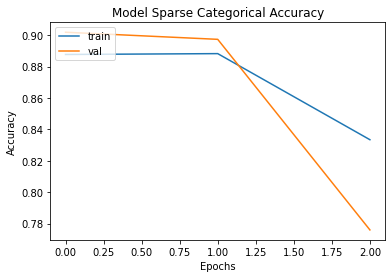

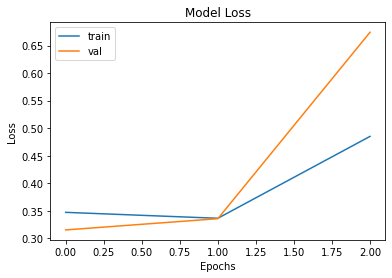

In [20]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title("Model Sparse Categorical Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','val'], loc = "upper left")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train', 'val'], loc = "upper left")
plt.show()


In [22]:
test_loss, test_acc = model.evaluate(test_set_for_final_model, verbose = 2)
print("\n Test Accuracy: ", test_acc)

194/194 - 62s - loss: 0.6768 - sparse_categorical_accuracy: 0.7715 - 62s/epoch - 321ms/step

 Test Accuracy:  0.7714654803276062


In [32]:
predict_score_and_class_dict = {0: 'Hate Speech',
 1: 'Offensive Language',
 2: 'Neither'}
preds = model(tokenizer(["This guy is a retard"],return_tensors="tf",padding=True,truncation=True))['logits']
print(preds)
class_preds = np.argmax(preds, axis=1)

for pred in class_preds:
  print(predict_score_and_class_dict[pred])

tf.Tensor([[-1.6803228  1.1971085 -0.7979548]], shape=(1, 3), dtype=float32)
Offensive Language
